<a href="https://colab.research.google.com/github/Mayank-goyal2424/Deep_learning/blob/master/Train_image_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Train Image Classification Model**


Hi, in this lesson, you will discover how to train and evaluate a convolutional neural network for image classification.

The Fashion-MNIST clothing classification problem is a new standard dataset used in computer vision and deep learning.

It is a dataset comprised of 60,000 small square 28x28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.

The example below loads the dataset, scales the pixel values, then fits a convolutional neural network on the training dataset and evaluates the performance of the network on the test dataset.

In [0]:
# fit a cnn on the fashion mnist dataset
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [0]:
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [83]:
trainX.shape

(60000, 28, 28)

In [84]:
trainY.shape

(60000,)

In [85]:
testX.shape

(10000, 28, 28)

In [86]:
testY.shape

(10000,)

In [0]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [88]:
trainX.shape

(60000, 28, 28, 1)

In [89]:
testX.shape

(10000, 28, 28, 1)

In [90]:
trainX

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [0]:
# convert from integers to floats
trainX, testX = trainX.astype('float32'), testX.astype('float32')

In [0]:
# normalize to range 0-1
trainX,testX  = trainX / 255.0, testX / 255.0

In [0]:
# one hot encode target values
trainY, testY = to_categorical(trainY), to_categorical(testY)

In [0]:
'''# define model
model = Sequential()
model.add(Conv2D(32, (3, 3),strides=1,padding='same' ,activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3),strides=1,padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3),strides=1,padding='same' ,activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3),strides=1,padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3),strides=1,padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(60, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.8))
model.add(Dense(10, activation='softmax'))'''
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [95]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
# fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.3690 - accuracy: 0.8688
Epoch 2/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2504 - accuracy: 0.9087
Epoch 3/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2064 - accuracy: 0.9238
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1744 - accuracy: 0.9349
Epoch 5/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1485 - accuracy: 0.9440
Epoch 6/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1261 - accuracy: 0.9530
Epoch 7/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1091 - accuracy: 0.9594
Epoch 8/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0928 - accuracy: 0.9656
Epoch 9/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0791 - accuracy: 0.9709
Epoch 10/10
60000/60000 [=====================

In [98]:
# evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(loss, acc)

0.33775288267433645 0.9111999869346619


In [106]:
import numpy as np
prediction = model.predict(testX[4:5])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [6.5407931e-04 4.9227935e-12 2.2408465e-04 3.6640886e-06 2.1929512e-04
 6.9006370e-09 9.9889874e-01 2.2136118e-10 8.5252182e-08 2.1333635e-09]

Thresholded Score:
 [0 0 0 0 0 0 1 0 0 0]

Predicted Digit:
 6


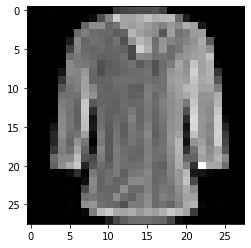

In [107]:
import pylab as plt

plt.imshow(testX[4].reshape(28,28),cmap='gray')
plt.show()

**Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle**




